# 1. Mount Google Drive

In [ ]:
# Mengkoneksikan ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Load data 10 File Citra yang ada pada file Google Drive

In [ ]:
import os
# Memanggil folder yang ada di google drive
folder_path = '/content/drive/MyDrive/Computer Vision/Citra Buah Apel'
os.chdir(folder_path)

# Menampilkan nama file citra yang ada di dalam folder
for file_name in os.listdir(folder_path):
    print(f"Nama File: {file_name}")

Nama File: Apel Segar (1).jpg
Nama File: Apel Segar (10).jpg
Nama File: Apel Segar (15).jpg
Nama File: Apel Segar (20).jpg
Nama File: Apel Segar (5).jpg
Nama File: Apel Busuk (10).jpg
Nama File: Apel Busuk (15).jpg
Nama File: Apel Busuk (20).jpg
Nama File: Apel Busuk (1).jpg
Nama File: Apel Busuk (5).jpg
Nama File: data_apel.csv
Nama File: data_apel (1).csv


# 3. Import Library

In [ ]:
# Mengimport library yang dibutuhkan
import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from PIL import Image
import glob

# 4. Melakukan Konversi Citra Dari BGR ke RGB Kemudian RGB ke HSV

In [ ]:
# Memanggil folder yang ada di google drive
folder_citra = '/content/drive/MyDrive/Computer Vision/Citra Buah Apel'
folder_simpan = '/content/drive/MyDrive/Computer Vision/Citra Buah Apel HSV'

for file_name in os.listdir(folder_citra):
    # Citra yang dipanggil berformat .jpg, .jpeg, dan .png
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
        # Membaca data citra
        image = cv2.imread(os.path.join(folder_citra, file_name))
        # Merubah ukuran citra menjadi 200x200
        resize = cv2.resize(image, (200,200))
        # Mengkonversi citra yang sudah di resize dari BGR ke RGB
        img_rgb = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
        # Mengkonversi citra dari RGB ke HSV
        img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
        # Menyimpan citra hasil Konversi
        cv2.imwrite(os.path.join(folder_simpan, f"HSV_{file_name}"), img_hsv)
        # Menampilkan teks untuk memberitahu hasil konversi
        print(f'File {file_name} berhasil diubah menjadi HSV.')

# 5. Menampilkan Citra Hasil Konversi

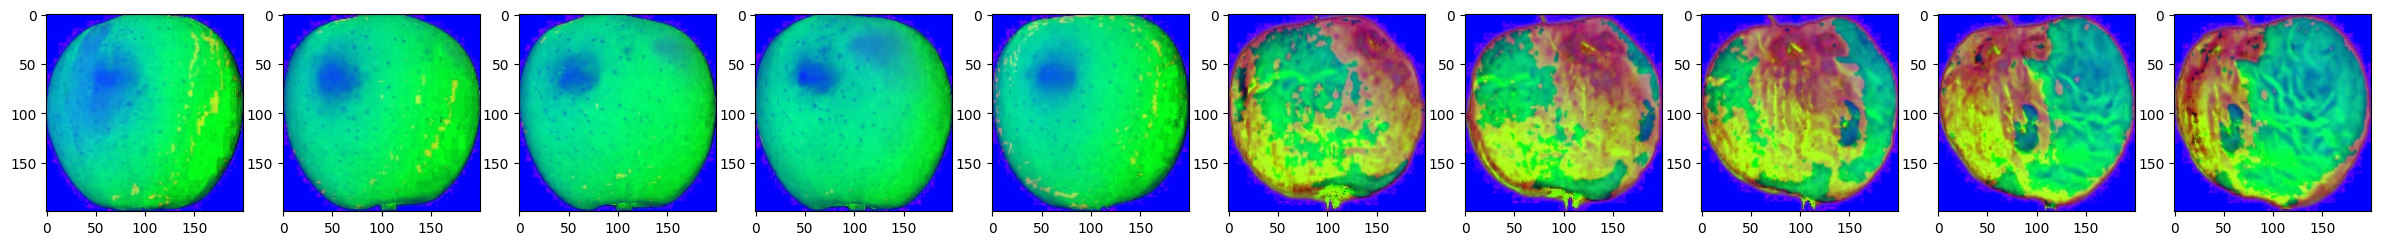

In [ ]:
# Memanggil folder yang ada di google drive
folder_HSV = '/content/drive/MyDrive/Computer Vision/Citra Buah Apel HSV'
files = glob.glob(os.path.join(folder_HSV, "*.jpg"))

images = []
for file in files:
    # Membaca data citra yang ada di dalam folder
    img = cv2.imread(file)
    images.append(img)

# Menampilkan semua citra hasil konversi
fig, axs = plt.subplots(1, len(images), figsize=(30, 20))
for i, image in enumerate(images):
    axs[i].imshow(image)

# 6. Mencari Nilai Rata-Rata Hue, Saturation, dan Value Citra

In [ ]:
# Memanggil folder yang ada di google drive
folder_HSV = '/content/drive/MyDrive/Computer Vision/Citra Buah Apel HSV'
files = glob.glob(os.path.join(folder_HSV, "*.jpg"))

data = []
for file in files:
    # Membaca data citra yang ada di dalam folder
    img = cv2.imread(file)
    # Mengambil data Hue, Saturation, dan Value
    H = img[:,:,0]
    S = img[:,:,1]
    V = img[:,:,2]
    # Menghitung nilai rata-rata dari nilai Hue, Saturation, dan Value
    meanH = np.mean(H)
    meanS = np.mean(S)
    meanV = np.mean(V)
    filename = os.path.basename(file)
    data.append([meanH, meanS, meanV])

# Mnjadikan data yang telah didapat menjadi file dengan ekstensi .csv
df = pd.DataFrame(data, columns=['MeanH', 'MeanS', 'MeanV'])
df.to_csv('data_apel.csv', index=False)

NameError: ignored

# 7. Mendeteksi satu Citra Apel Segar Atau Busuk Menggunakan Metode KNN

In [ ]:
# Memanggil file csv
path = 'data_apel (1).csv'
dataApel = pd.read_csv(path)

# Train model
X = dataApel[['MeanH', 'MeanS', 'MeanV']]
Y = dataApel ["kematangan"]
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X,Y)

# Contoh nilai rata-rata HSV untuk mendeteksi citra buah apel itu bagus atau busuk
data = [12.759500,164.588525,150.664050]
hasilprediksi = knn.predict([data])
hasilprediksi = float(hasilprediksi)
# Menampilkan Hasil Prediksi
print("Hasil Prediksi = ",hasilprediksi)
if hasilprediksi == 1:
  print("Apel Ini Matang")
elif hasilprediksi == 0:
  print("Apel Ini Busuk")
else:
  print("Kesegaran Atau Kebusukan Tidak Teridentifikasi")

print("")

Hasil Prediksi =  1.0
Apel Ini Matang



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


# 8. Tahap Pengetesan : Mengkonveesi Citra Yang Akan Dites dari BGR ke RGB kemudian RGB ke HSV

In [ ]:
# Memanggil folder yang ada di google drive
folder_citraTES = '/content/drive/MyDrive/Computer Vision/Coba Tes Metode'
folder_simpanTES = '/content/drive/MyDrive/Computer Vision/Coba Tes Metode HSV'

for file_name in os.listdir(folder_citraTES):
    # Citra yang dipanggil berformat .jpg, .jpeg, dan .png
    if file_name.endswith('.jpg') or file_name.endswith('.jpeg') or file_name.endswith('.png'):
        # Membaca data citra
        image = cv2.imread(os.path.join(folder_citraTES, file_name))
        # Merubah ukuran citra
        resize = cv2.resize(image, (200,200))
        # Mengkonversi citra yang sudah di resize dari BGR ke RGB
        img_rgb = cv2.cvtColor(resize, cv2.COLOR_BGR2RGB)
        # Mengkonversi citra dari RGB ke HSV
        img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)
        # Menyimpan citra hasil Konversi
        cv2.imwrite(os.path.join(folder_simpanTES, f"HSV_{file_name}"), img_hsv)
        # Menampilkan teks untuk memberitahu hasil konversi
        print(f'File {file_name} berhasil diubah menjadi HSV.')

File Apel Segar (26).jpg berhasil diubah menjadi HSV.
File Apel Segar (20).jpg berhasil diubah menjadi HSV.
File Apel Segar (24).jpg berhasil diubah menjadi HSV.
File Apel Segar (19).jpg berhasil diubah menjadi HSV.
File Apel Segar (25).jpg berhasil diubah menjadi HSV.
File Apel Segar (21).jpg berhasil diubah menjadi HSV.
File Apel Segar (22).jpg berhasil diubah menjadi HSV.
File Apel Segar (23).jpg berhasil diubah menjadi HSV.
File Apel Segar (17).jpg berhasil diubah menjadi HSV.
File Apel Segar (18).jpg berhasil diubah menjadi HSV.
File Apel Segar (16).jpg berhasil diubah menjadi HSV.
File Apel Segar (11).jpg berhasil diubah menjadi HSV.
File Apel Segar (13).jpg berhasil diubah menjadi HSV.
File Apel Segar (12).jpg berhasil diubah menjadi HSV.
File Apel Segar (10).jpg berhasil diubah menjadi HSV.
File Apel Segar (14).jpg berhasil diubah menjadi HSV.
File Apel Segar (15).jpg berhasil diubah menjadi HSV.
File Apel Segar (9).jpg berhasil diubah menjadi HSV.
File Apel Segar (8).jpg berha

# 9. Mendeteksi Semua Citra Apel Segar Atau Busuk dari 1 Folder Menggunakan Metode KNN

In [ ]:
# Memanggil file csv
path = 'data_apel (1).csv'
dataApel = pd.read_csv(path)

# Train model
X = dataApel[['MeanH', 'MeanS', 'MeanV']]
Y = dataApel['kematangan']
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, Y)

# Memprediksi citra baru yang akan di klasifikasikan
# Memanggil folder yang ada di google drive
folder_HSV = '/content/drive/MyDrive/Computer Vision/Coba Tes Metode HSV'
files = glob.glob(os.path.join(folder_HSV, "*.jpg"))

for file in files:
    # Membaca data citra yang ada di dalam folder
    img = cv2.imread(file)
    # Mengambil data Hue, Saturation, dan Value
    H = img[:,:,0]
    S = img[:,:,1]
    V = img[:,:,2]
    # Menghitung nilai rata-rata dari nilai Hue, Saturation, dan Value
    meanH = np.mean(H)
    meanS = np.mean(S)
    meanV = np.mean(V)
    # Mengambil data dari rata-rata nilai Hue, Saturation, dan Value untuk dimasukkan ke array
    new_data = [[meanH, meanS, meanV]]
    # Memprediksi citra menggunakan data yang telah diambil
    hasil_prediksi = knn.predict(new_data)
    hasil_prediksi = float(hasil_prediksi)
    # Menampilkan hasil prediksi apabila citra tersebut bernilai 1 maka apel segar, jika citra tersebut bernilai 0 maka apel busuk
    print("Hasil prediksi buah apel pada citra", os.path.basename(file), ": ", hasil_prediksi)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 

Hasil prediksi buah apel pada citra HSV_Apel Segar (26).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (20).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (24).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (19).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (25).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (21).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (22).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (23).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (17).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (18).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (16).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (11).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (13).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (12).jpg :  1.0
Hasil prediksi buah apel pada citra HSV_Apel Segar (10).jpg : 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have 